# 911 Calls

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [10]:
df['title'].nunique()

110

In [13]:
 
    df['title'].iloc[0].split(':')[0]

'EMS'

In [14]:
df['reasons'] = df['title'].apply(lambda x:x.split(':')[0])

In [17]:
df['reasons'].nunique()

3

In [19]:
df['reasons'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reasons, dtype: int64

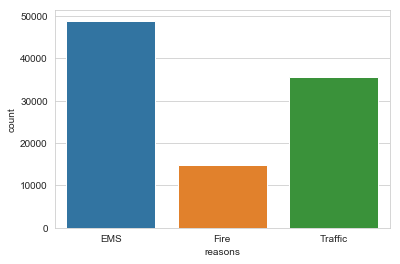

In [21]:
sns.countplot(x='reasons', data=df )

In [25]:
type(df['timeStamp'].iloc[0])

str

In [26]:
df['timeStamp'].head()

0    2015-12-10 17:40:00
1    2015-12-10 17:40:00
2    2015-12-10 17:40:00
3    2015-12-10 17:40:01
4    2015-12-10 17:40:01
Name: timeStamp, dtype: object

In [28]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])


In [50]:
df['hour']= df['timeStamp'].apply(lambda time:time.hour)
df['month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)


In [51]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [52]:
df['Day of Week'] = df['Day of Week'].map(dmap)

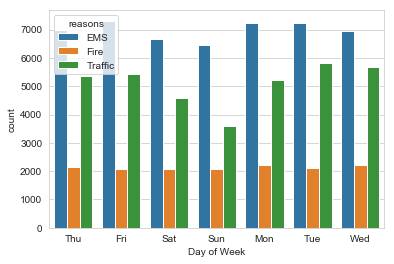

In [55]:
sns.countplot(x='Day of Week', data=df, hue='reasons')

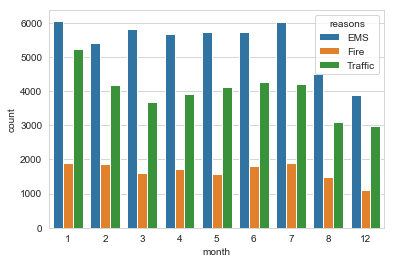

In [56]:
sns.countplot(x='month', data=df, hue='reasons')

In [57]:
df['month'].nunique()

9

In [62]:
byMonth = df.groupby('month').count()

In [64]:
byMonth.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,Hour,hour,Day of Week
month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


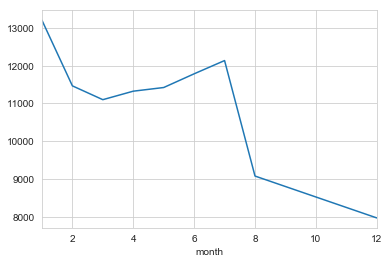

In [66]:
byMonth['lat'].plot()

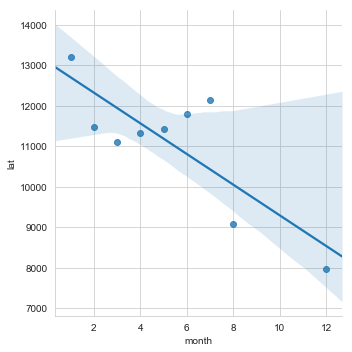

In [73]:
sns.lmplot(x='month', y='lat', data = byMonth.reset_index())

In [77]:
df['Date']= df['timeStamp'].apply(lambda x:x.date())

In [78]:
byDate = df.groupby('Date').count()

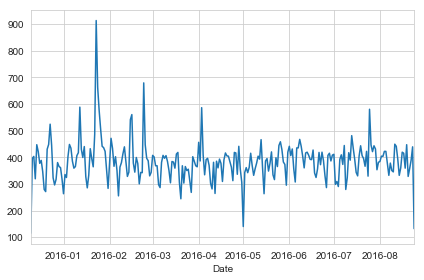

In [84]:
byDate['lat'].plot()
plt.tight_layout()

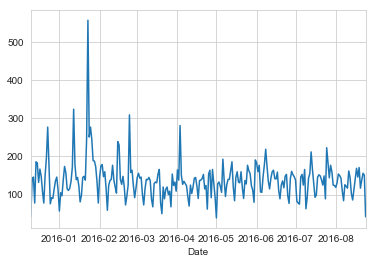

In [91]:
df[df['reasons']=='Traffic'].groupby('Date').count()['twp'].plot()

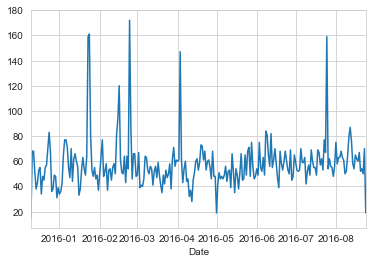

In [92]:
df[df['reasons']=='Fire'].groupby('Date').count()['twp'].plot()

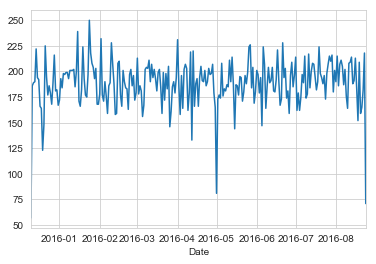

In [93]:
df[df['reasons']=='EMS'].groupby('Date').count()['twp'].plot()

In [98]:
dayHour=df.groupby(by=['Day of Week','hour']).count()['reasons'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


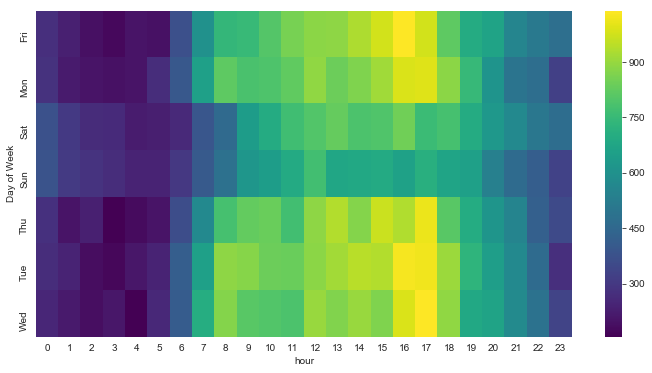

In [101]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap ='viridis')

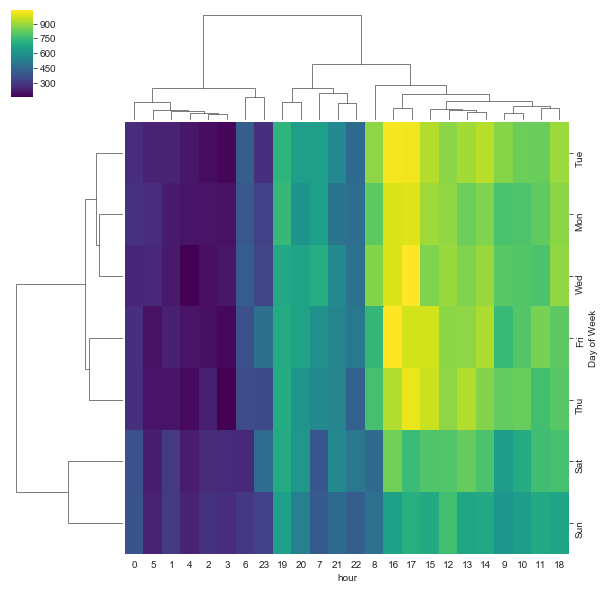

In [102]:
sns.clustermap(dayHour,cmap ='viridis')

In [105]:
daymonth=df.groupby(by=['Day of Week','month']).count()['reasons'].unstack()
daymonth.head()

month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


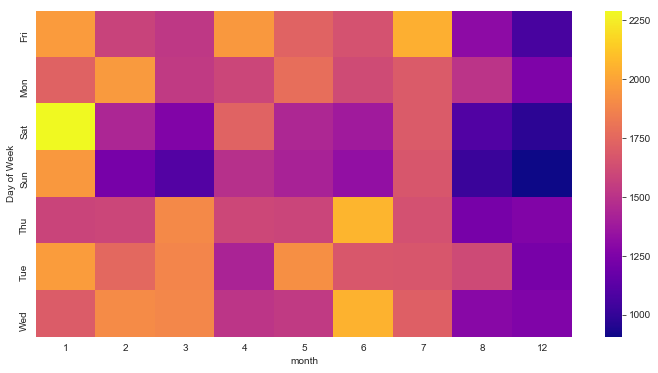

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(daymonth,cmap ='plasma')

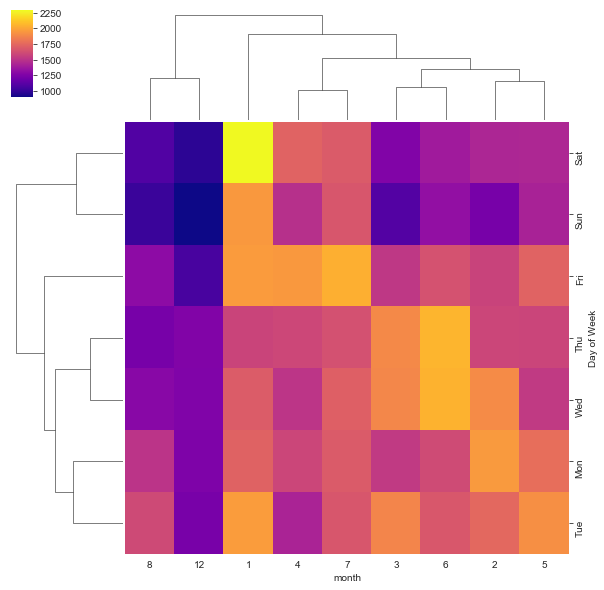

In [108]:
sns.clustermap(daymonth,cmap ='plasma')